# OC - Parcours Ingénieur IA - Projet Olist - BERKAN Asli Ceren
# Partie I : Analyse exploratoire et nettoyage du jeu de données

Le projet 5 (ou projet Olist) effectué dans le cadre de la formation en ingénieur IA a pour but de segmenter les clients d'une solution de vente sur les marketplaces en ligne (Olist).

Les équipes d'e-commerce pourront utiliser la segmentation des clients au quotidien pour leurs compagnes de communication. Ainsi, on peut comprendre les différents types d'utilisateurs grâce à leur comportement et à leurs données personnelles. Pour ce faire, on doit fournir une description actionnable de la segmentation et une proposition de contrat de maintenance basée sur l'analyse de la stabilité des segments au cours du temps.

La base de données est fournie par Olist. On doit donc utiliser des méthodes non supervisées pour regrouper l'ensemble des clients de profils similaires.

## Table of Contents

* [Introduction](#chapter0)
* [1. Analyse exploratoire du jeu de données](#chapter1)
    * [1.1. Données : Customers dataset](#section_1_1)
    * [1.2. Données : Geolocation dataset](#section_1_2)
    * [1.3. Données : Order items dataset](#section_1_3)
    * [1.4. Données : Order payment dataset](#section_1_4)
    * [1.5. Données : Order reviews dataset](#section_1_5)
    * [1.6. Données : Order dataset](#section_1_6)
    * [1.7. Données : Order products dataset](#section_1_7)
    * [1.8. Données : Sellers dataset](#section_1_8)
    * [1.9. Résumé et fusion de données](#section_1_9)
* [2. Nettoyage du jeu de données](#chapter2)
    * [2.1. Les données manquantes](#section_2_1)
    * [2.2. Les données dupliquées](#section_2_2)
    * [2.3. Les données aberrantes/outliers](#section_2_3)
    * [2.4. Transformation des dates](#section_2_4)
    * [2.5. Transformation des variables catégorielles](#section_2_5)
    * [2.6. Création des nouvelles variables](#section_2_6)

In [1]:
# Pour la vérification de la convention PEP8
#pip install flake8 pycodestyle_magic

In [2]:
# Pour la vérification de la convention PEP8
#%load_ext pycodestyle_magic

In [3]:
# Pour la vérification de la convention PEP8
#%pycodestyle_on

In [4]:
# Pour travailler avec Google colab
#from google.colab import drive
#drive.mount('/content/drive')

In [5]:
# Importer les librairies utiles
import pandas as pd  # pour importer les données sous formes de dataframe
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import dill  # Enregistrer une session Notebook
import missingno as msno  # Afficher les données manquantes

from sklearn.preprocessing import LabelEncoder  # Variables catégorielles
from math import radians
from wordcloud import WordCloud
from PIL import Image

In [6]:
#customer_data = pd.read_csv("/content/drive/MyDrive/0_OC_ParcoursIA/Projet5/data/olist_customers_dataset.csv")
#geo_data = pd.read_csv("/content/drive/MyDrive/0_OC_ParcoursIA/Projet5/data/olist_geolocation_dataset.csv")
#order_itemdata = pd.read_csv("/content/drive/MyDrive/0_OC_ParcoursIA/Projet5/data/olist_order_items_dataset.csv")
#pay_data = pd.read_csv("/content/drive/MyDrive/0_OC_ParcoursIA/Projet5/data/olist_order_payments_dataset.csv")
#rev_data = pd.read_csv("/content/drive/MyDrive/0_OC_ParcoursIA/Projet5/data/olist_order_reviews_dataset.csv")
#orders = pd.read_csv("/content/drive/MyDrive/0_OC_ParcoursIA/Projet5/data/olist_orders_dataset.csv")
#order_prddata = pd.read_csv("/content/drive/MyDrive/0_OC_ParcoursIA/Projet5/data/olist_products_dataset.csv")
#order_selldata = pd.read_csv("/content/drive/MyDrive/0_OC_ParcoursIA/Projet5/data/olist_sellers_dataset.csv")
#order_prd_catdata = pd.read_csv("/content/drive/MyDrive/0_OC_ParcoursIA/Projet5/data/product_category_name_translation.csv")

In [7]:
def affiche_df(data):
    """Cette fonction affiche plusieurs caractéristique
    d'une dataframe fournit en entrée :
    - La taille de la dataframe,
    - Les noms des colonnes,
    - Les types de données,
    - Le nombre de données manquantes par colonne,
    - Le nombre de valeur unique,
    - Affichage des premières lignes.
    """
    taille_data = data.shape
    print('Le jeu de données contient '
          + str(taille_data[0])
          + ' lignes et '
          + str(taille_data[1])
          + ' colonnes. \n')

    print('Les noms des features sont :')
    print(data.columns.tolist())
    print('\n')

    print('Les types de données :')
    print(data.dtypes)
    print('\n')

    print('Le nombre de données manquantes par colonne :')
    print(data.isnull(). sum())
    print('\n')

    print('Le nombre de valeur unique :')
    print(data.nunique())
    print('\n')

    print('Affichage des premières lignes :')
    display(data.head())

## 1. Analyse exploratoire du jeu de données <a class="anchor" id="chapter1"></a>

Au total, 9 fichiers sont disponibles dans le cadre de ce projet. Les différents fichiers contiennent les informations suivantes :
* Les données sur les clients,
* Les données de géolocalisation,
* Les données des articles commandés,
* Les données des paiements,
* Les données des avis,
* Les données des commandes,
* Les données des produits,
* Les données des vendeurs
* Les données pour la traduction en anglais des noms des produits.

L'analyse exploratoire du jeu de données permettra de comprendre le contenu de chacun de ces fichiers. Cette analyse sera accompagnée des illustrations en fonction des données.

In [8]:
customer_data = pd.read_csv('data/olist_customers_dataset.csv')
geo_data = pd.read_csv('data/olist_geolocation_dataset.csv')
order_itemdata = pd.read_csv('data/olist_order_items_dataset.csv')
pay_data = pd.read_csv('data/olist_order_payments_dataset.csv')
rev_data = pd.read_csv('data/olist_order_reviews_dataset.csv')
orders = pd.read_csv('data/olist_orders_dataset.csv')
order_prddata = pd.read_csv('data/olist_products_dataset.csv')
order_selldata = pd.read_csv('data/olist_sellers_dataset.csv')
order_prd_catdata = pd.read_csv('data/product_category_name_translation.csv')

### 1.1. Données : Customers dataset <a class="anchor" id="section_1_1"></a>

In [9]:
# Affichage du résumé de la base de données clients
affiche_df(customer_data)

Le jeu de données contient 99441 lignes et 5 colonnes. 

Les noms des features sont :
['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']


Les types de données :
customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object


Le nombre de données manquantes par colonne :
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


Le nombre de valeur unique :
customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64


Affichage des premières lignes :


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


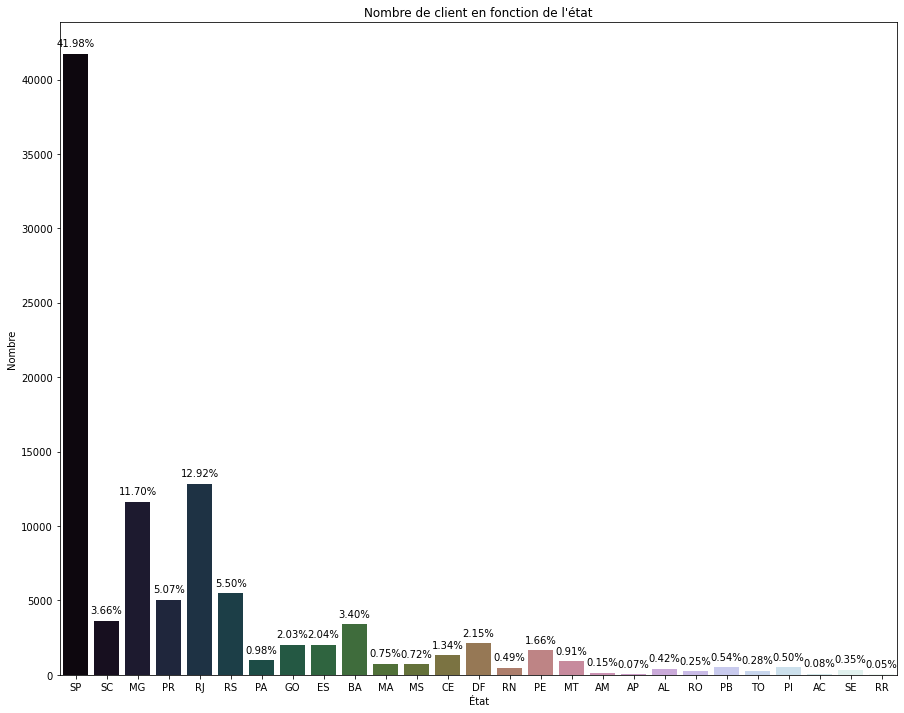

In [10]:
# Traçage du nombre de client par état
data = customer_data
total = len(data['customer_state'])

plt.figure(figsize=(15, 12))
ax = sns.countplot(x='customer_state', data=data, palette='cubehelix')
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100 * p.get_height() / total),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points')
ax.set_title('Nombre de client en fonction de l\'état')
ax.set_xlabel('État')
ax.set_ylabel('Nombre')
ax.set_facecolor('w')
plt.show()

### 1.2. Données : Geolocation dataset <a class="anchor" id="section_1_2"></a>

In [11]:
# Affichage du résumé de la base de données de géolocalisation
affiche_df(geo_data)

Le jeu de données contient 1000163 lignes et 5 colonnes. 

Les noms des features sont :
['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state']


Les types de données :
geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object


Le nombre de données manquantes par colonne :
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64


Le nombre de valeur unique :
geolocation_zip_code_prefix     19015
geolocation_lat                717358
geolocation_lng                717613
geolocation_city                 8011
geolocation_state                  27
dtype: int64


Affichage des premières lignes :


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


### 1.3. Données : Order items dataset <a class="anchor" id="section_1_3"></a>

In [12]:
# Affichage du résumé de la base de données des produits par commandes
affiche_df(order_itemdata)

Le jeu de données contient 112650 lignes et 7 colonnes. 

Les noms des features sont :
['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']


Les types de données :
order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object


Le nombre de données manquantes par colonne :
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


Le nombre de valeur unique :
order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64


Affichage des premières lignes :


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### 1.4. Données : Order payment dataset <a class="anchor" id="section_1_4"></a>

In [13]:
# Affichage du résumé de la base de données des paiements
affiche_df(pay_data)

Le jeu de données contient 103886 lignes et 5 colonnes. 

Les noms des features sont :
['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']


Les types de données :
order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object


Le nombre de données manquantes par colonne :
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


Le nombre de valeur unique :
order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64


Affichage des premières lignes :


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


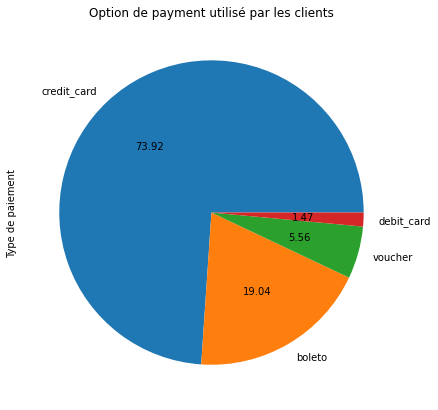

In [14]:
# Affichage des différents types de paiement utilisé
ax = pay_data[pay_data['payment_type'] != 'not_defined']\
    ['payment_type'].value_counts().plot(kind='pie',
                                         figsize=(7, 7), autopct='%.2f')
plt.title('Option de payment utilisé par les clients')
ax.set_ylabel('Type de paiement')
plt.show()

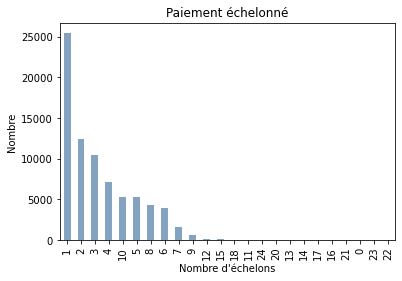

In [15]:
# Affichage du nombre de paiement échelonnés
ax = pay_data[pay_data['payment_type'] == 'credit_card'] \
    ['payment_installments'].value_counts().plot(kind='bar',
                                                 color=(0.2, 0.4, 0.6, 0.6))
ax.set_title('Paiement échelonné')
ax.set_xlabel('Nombre d\'échelons')
ax.set_ylabel('Nombre')
ax.set_facecolor('w')
plt.show()

### 1.5. Données : Order reviews dataset <a class="anchor" id="section_1_5"></a>

In [16]:
# Affichage du résumé de la base de données des avis
affiche_df(rev_data)

Le jeu de données contient 100000 lignes et 7 colonnes. 

Les noms des features sont :
['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']


Les types de données :
review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object


Le nombre de données manquantes par colonne :
review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64


Le nombre de valeur unique :
review_id                  99173
order_id                   99441
review_score                   5
review_comment_title        4600
review_comment_message     36921
revie

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


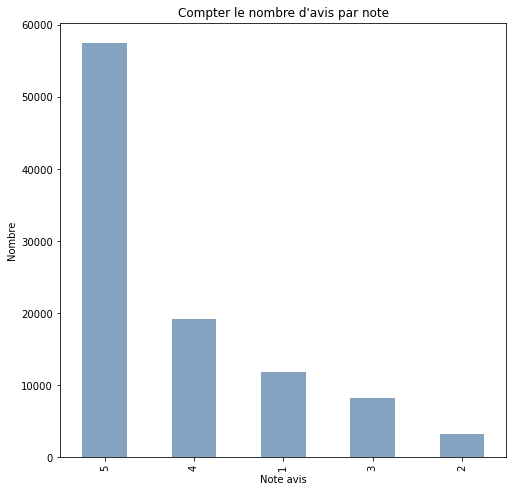

In [17]:
# Affichage du nombre d'avis par note
ax = rev_data['review_score'].value_counts().plot(kind='bar',
                                                  figsize=(8, 8),
                                                  color=(0.2, 0.4, 0.6, 0.6))
ax.set_title('Compter le nombre d\'avis par note')
ax.set_xlabel('Note avis')
ax.set_ylabel('Nombre')
ax.set_facecolor('w')
plt.show()

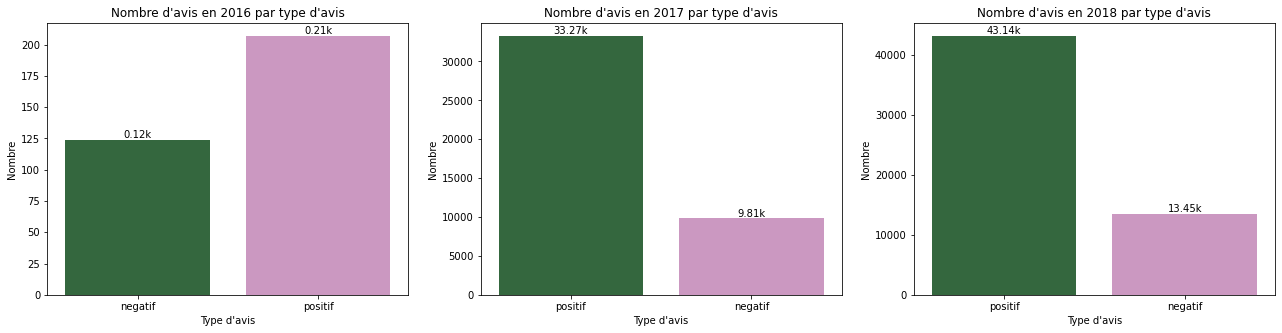

In [18]:
# Modification de la note en avis positif/négatif
rev_data_modif = rev_data.copy()

# Création d'une colonne contenant 'positif' ou 'negatif'
posOrNeg = []
for i in range(len(rev_data_modif)):
    if rev_data_modif['review_score'][i] == 4 or \
       rev_data_modif['review_score'][i] == 5:
        posOrNeg.append('positif')
    else:
        posOrNeg.append('negatif')
rev_data_modif['positif_negatif'] = posOrNeg

# Conversion des données de date
rev_data_modif['review_creation_date'] = pd.to_datetime(
    rev_data_modif['review_creation_date'])
rev_data_modif['review_creation_date_year'] = rev_data_modif[
    'review_creation_date'].dt.to_period('Y')

fig, ax = plt.subplots(1, 3, figsize=(22, 5))
p1 = sns.countplot(x='positif_negatif',
                   data=rev_data_modif[rev_data_modif[
                       'review_creation_date_year'] == '2016'],
                   ax=ax[0], palette='cubehelix')
for p in p1.patches:
    xp = p.get_bbox().get_points()[:, 0]
    yp = p.get_bbox().get_points()[1, 1]
    p1.annotate('{:.2f}k'.format(yp/1000), (xp.mean(), yp),
                ha='center', va='bottom')

p2 = sns.countplot(x='positif_negatif',
                   data=rev_data_modif[rev_data_modif[
                       'review_creation_date_year'] == '2017'],
                   ax=ax[1], palette='cubehelix')
for p in p2.patches:
    xp = p.get_bbox().get_points()[:, 0]
    yp = p.get_bbox().get_points()[1, 1]
    p2.annotate('{:.2f}k'.format(yp/1000), (xp.mean(), yp),
                ha='center', va='bottom')

p3 = sns.countplot(x='positif_negatif',
                   data=rev_data_modif[rev_data_modif[
                       'review_creation_date_year'] == '2018'],
                   ax=ax[2], palette='cubehelix')
for p in p3.patches:
    xp = p.get_bbox().get_points()[:, 0]
    yp = p.get_bbox().get_points()[1, 1]
    p3.annotate('{:.2f}k'.format(yp/1000), (xp.mean(), yp),
                ha='center', va='bottom')

ax[0].set_title('Nombre d\'avis en 2016 par type d\'avis')
ax[1].set_title('Nombre d\'avis en 2017 par type d\'avis')
ax[2].set_title('Nombre d\'avis en 2018 par type d\'avis')
for i in range(3):
    ax[i].set_xlabel('Type d\'avis')
    ax[i].set_ylabel('Nombre')
    ax[i].set_facecolor('w')

plt.show()

### 1.6. Données : Order dataset <a class="anchor" id="section_1_6"></a>

In [19]:
# Affichage du résumé de la base de données des commandes
affiche_df(orders)

Le jeu de données contient 99441 lignes et 8 colonnes. 

Les noms des features sont :
['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']


Les types de données :
order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object


Le nombre de données manquantes par colonne :
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


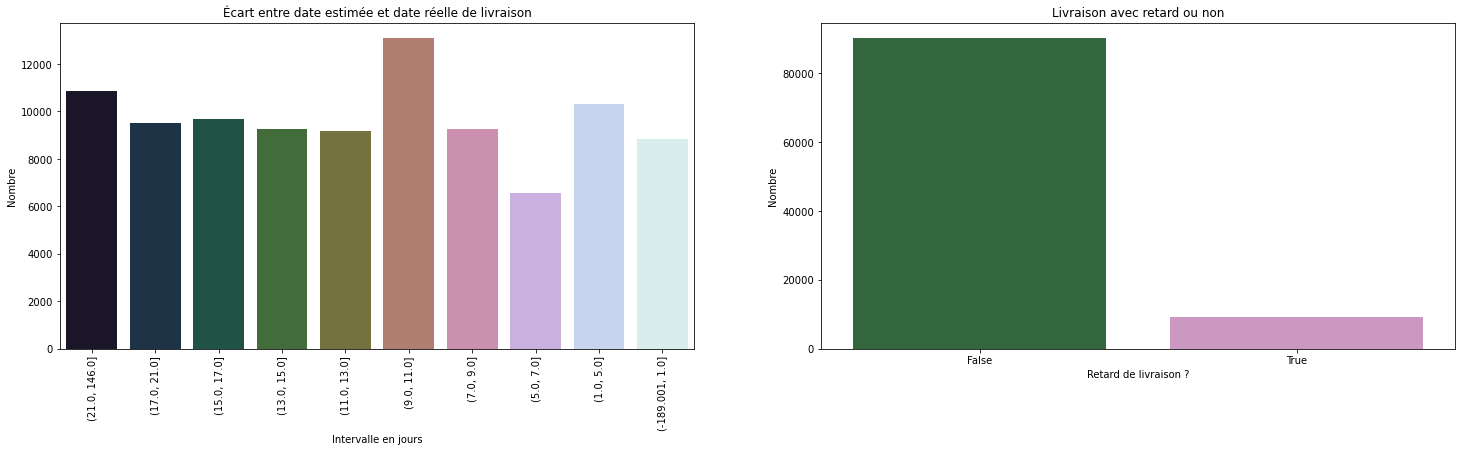

In [20]:
# Affichage des écarts de livraison
orders_modif = orders.copy()

orders_modif['order_purchase_timestamp'] = pd.to_datetime(
    orders_modif['order_purchase_timestamp'])
orders_modif['order_estimated_delivery_date'] = pd.to_datetime(
    orders_modif['order_estimated_delivery_date'])
orders_modif['order_delivered_customer_date'] = pd.to_datetime(
    orders_modif['order_delivered_customer_date'])
orders_modif['order_approved_at'] = pd.to_datetime(
    orders_modif['order_approved_at'])

orders_modif['order_purchase_timestamp_year'] = orders_modif[
    'order_purchase_timestamp'].dt.to_period('Y')
orders_modif['order_purchase_timestamp_month'] = orders_modif[
    'order_purchase_timestamp'].dt.to_period('M')

orders_modif['order_diff'] = (orders_modif[
    'order_estimated_delivery_date'] - orders_modif[
    'order_delivered_customer_date']).dt.days
orders_modif = orders_modif.sort_values(by='order_diff', ascending=False)
orders_modif['order_diff_bin'] = pd.qcut(orders_modif['order_diff'], q=10)

l_bins = orders_modif[orders_modif['order_diff_bin']
                      != 'NaN']['order_diff_bin']
l_bins.dropna(inplace=True)

fig, ax = plt.subplots(1, 2, figsize=(25, 6))
p1 = sns.countplot(x='order_diff_bin', data=orders_modif,
                   ax=ax[0], palette='cubehelix')
p1.set_facecolor('w')
p1.set_xticklabels(rotation=90, labels=l_bins.unique())
p1.set_title('Écart entre date estimée et date réelle de livraison')
p1.set_xlabel('Intervalle en jours')
p1.set_ylabel('Nombre')

orders_modif['islate'] = orders_modif['order_diff'] <= 0
p2 = sns.countplot(x='islate', data=orders_modif, ax=ax[1],
                   palette='cubehelix')
p2.set_facecolor('w')
p2.set_title('Livraison avec retard ou non')
p2.set_xlabel('Retard de livraison ?')
p2.set_ylabel('Nombre')

plt.show()

In [21]:
# Affichage du nombre de commande par statut de livraison
print(orders_modif['order_status'].value_counts())

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64


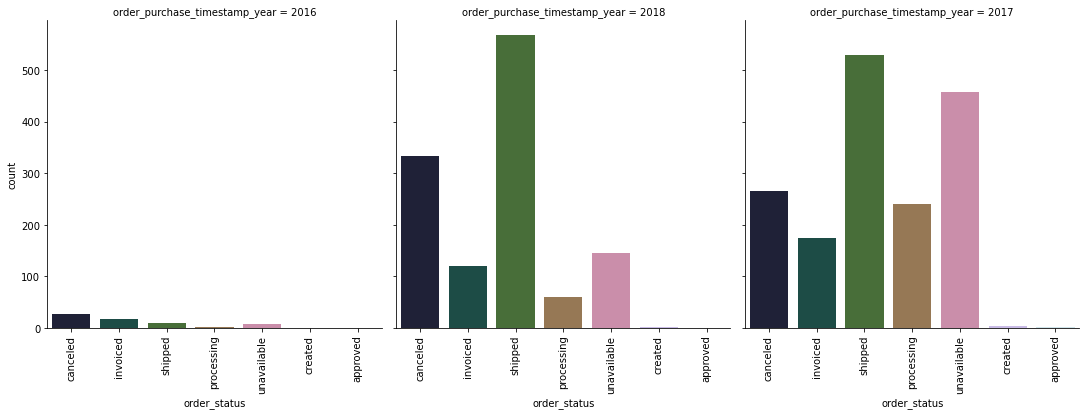

In [22]:
# Affichage du nombre de commande par statut de livraison hors "livré"
ax = sns.catplot(x='order_status', col='order_purchase_timestamp_year',
                 kind='count', data=orders_modif[orders_modif[
                     'order_status'] != 'delivered'], palette='cubehelix')
ax.set_xticklabels(rotation=90)

### 1.7. Données : Order products dataset <a class="anchor" id="section_1_7"></a>

In [23]:
# Affichage du résumé de la base de données des produits
affiche_df(order_prddata)

Le jeu de données contient 32951 lignes et 9 colonnes. 

Les noms des features sont :
['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']


Les types de données :
product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object


Le nombre de données manquantes par colonne :
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


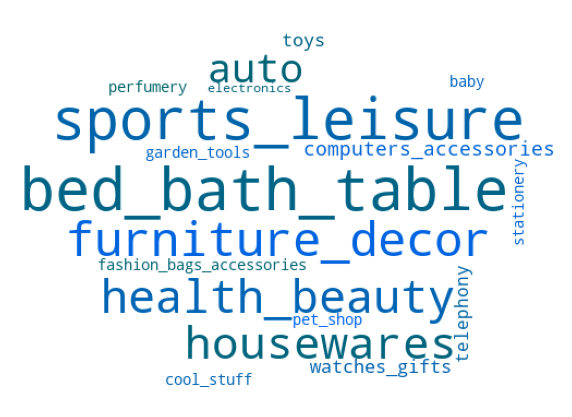

In [24]:
# Intégrer la  traduction en anglais des produits et affichage
order_prddata_trad = pd.merge(order_prddata, order_prd_catdata,
                              on='product_category_name')

mask = np.array(Image.open("images/cloud2.png"))
mask[mask == 1] = 255

def couleur(*args, **kwargs):
    import random
    return "rgb(0, 100, {})".format(random.randint(100, 255))

a = list(order_prddata_trad['product_category_name_english'])
word = [x for x in a if str(x) != 'nan']
word = " ".join(word)

wordcloud = WordCloud(width = 1200, height = 800,
                      background_color ='white',
                      min_font_size = 8, mask = mask,
                      collocations=False,
                      max_words = 50).generate(word)
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud.recolor(color_func = couleur)) 
plt.axis("off")  
plt.show()

### 1.8. Données : Sellers dataset <a class="anchor" id="section_1_8"></a>

In [25]:
# Affichage du résumé de la base de données des vendeurs
affiche_df(order_selldata)

Le jeu de données contient 3095 lignes et 4 colonnes. 

Les noms des features sont :
['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state']


Les types de données :
seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object


Le nombre de données manquantes par colonne :
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64


Le nombre de valeur unique :
seller_id                 3095
seller_zip_code_prefix    2246
seller_city                611
seller_state                23
dtype: int64


Affichage des premières lignes :


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### 1.9. Résumé et fusion de données <a class="anchor" id="section_1_9"></a>

In [26]:
# Résumé du nombre de colonnes, du nombre de lignes et les noms des colonnes
datasets = [customer_data, geo_data, order_itemdata, pay_data,
            rev_data, orders, order_prddata, order_selldata, order_prd_catdata]
titles = ['customers', 'geolocations', 'items', 'payments',
          'reviews', 'orders', 'products', 'sellers', 'category_translation']

info_df = pd.DataFrame({},)
info_df['dataset'] = titles

info_df['no_of_columns'] = [len(df.columns) for df in datasets]
info_df['columns_name'] = [', '.join(list(df.columns)) for df in datasets]
info_df['no_of_rows'] = [len(df) for df in datasets]

pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)
info_df

,dataset,no_of_columns,columns_name,no_of_rows
0,customers,5,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",99441
1,geolocations,5,"geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state",1000163
2,items,7,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",112650
3,payments,5,"order_id, payment_sequential, payment_type, payment_installments, payment_value",103886
4,reviews,7,"review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp",100000
5,orders,8,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",99441
6,products,9,"product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",32951
7,sellers,4,"seller_id, seller_zip_code_prefix, seller_city, seller_state",3095
8,category_translation,2,"product_category_name, product_category_name_english",71


In [27]:
# Type de données par colonne
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
new_df = pd.DataFrame({},)
new_df['dataset'] = titles

new_df['numeric_features'] = [len((df.select_dtypes(include=numerics)).columns)
                              for df in datasets]
new_df['num_features_name'] = [', '.join(list((df.select_dtypes(
    include=numerics)).columns))for df in datasets]
new_df['object_features'] = [len((df.select_dtypes(include='object')).columns)
                             for df in datasets]
new_df['objt_features_name'] = [', '.join(list((df.select_dtypes(
    include='object')).columns))for df in datasets]
new_df['bool_features'] = [len((df.select_dtypes(include='bool')).columns)
                           for df in datasets]

new_df

,dataset,numeric_features,num_features_name,object_features,objt_features_name,bool_features
0,customers,1,customer_zip_code_prefix,4,"customer_id, customer_unique_id, customer_city, customer_state",0
1,geolocations,3,"geolocation_zip_code_prefix, geolocation_lat, geolocation_lng",2,"geolocation_city, geolocation_state",0
2,items,3,"order_item_id, price, freight_value",4,"order_id, product_id, seller_id, shipping_limit_date",0
3,payments,3,"payment_sequential, payment_installments, payment_value",2,"order_id, payment_type",0
4,reviews,1,review_score,6,"review_id, order_id, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp",0
5,orders,0,,8,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",0
6,products,7,"product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",2,"product_id, product_category_name",0
7,sellers,1,seller_zip_code_prefix,3,"seller_id, seller_city, seller_state",0
8,category_translation,0,,2,"product_category_name, product_category_name_english",0


La fusion des données se fait sur une partie des fichiers (7/9), car en effet, on souhaite segmenter les clients, de ce fait, les données concernant les vendeurs ne seront pas prises en compte. De plus, les données de géolocalisations nécessitent un travail préparatoire avant la fusion. Je prends la décision de ne pas traiter les données de géolocalisations au début du projet, pour me concentrer sur la segmentation des clients. Je reviendrais sur le sujet de fusion des données de géolocalisations, si j'ai suffisamment de temps après avoir traité le cœur du sujet. 

In [28]:
# Fusion des données
df = pd.merge(orders, pay_data, on='order_id')
df = df.merge(customer_data, on='customer_id')
df = df.merge(order_itemdata, on='order_id')
df = df.merge(order_prddata, on='product_id')
df = df.merge(order_prd_catdata, on='product_category_name')
df = df.merge(rev_data, on='order_id')
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,...,19.0,8.0,13.0,housewares,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio bem amassada e danificada, o que ficará chato, pois se trata de um presente.",2017-10-11 00:00:00,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,...,19.0,8.0,13.0,housewares,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio bem amassada e danificada, o que ficará chato, pois se trata de um presente.",2017-10-11 00:00:00,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,...,19.0,8.0,13.0,housewares,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio bem amassada e danificada, o que ficará chato, pois se trata de um presente.",2017-10-11 00:00:00,2017-10-12 03:43:48
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,credit_card,...,19.0,8.0,13.0,housewares,b46f1e34512b0f4c74a72398b03ca788,4,NaN,Deveriam embalar melhor o produto. A caixa veio toda amassada e vou dar de presente.,2017-08-19 00:00:00,2017-08-20 15:16:36
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,credit_card,...,19.0,8.0,13.0,housewares,dc90f19c2806f1abba9e72ad3c350073,5,NaN,"Só achei ela pequena pra seis xícaras ,mais é um bom produto\r\n",2017-08-08 00:00:00,2017-08-08 23:26:23


In [29]:
# Peut-être une carte ici

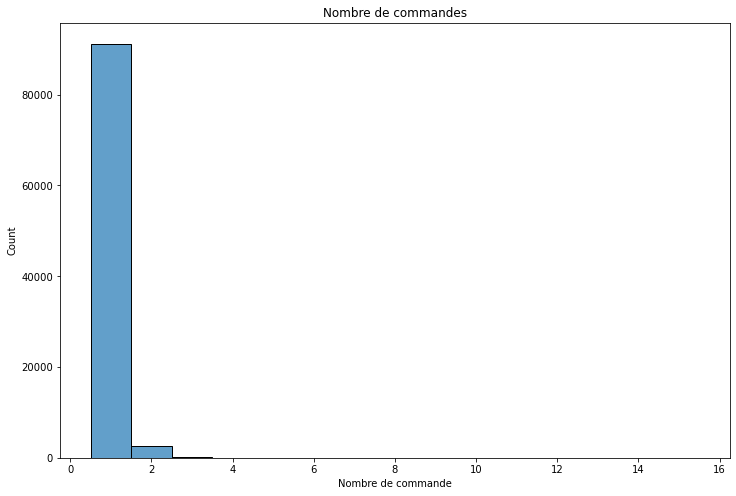

In [30]:
# Affichage du nombre de commande par client
fig = plt.figure(figsize=(12, 8))
ax = sns.histplot(df.groupby('customer_unique_id')
                  .agg({'order_id': 'nunique'}), x='order_id',
                  discrete=True, palette='cubehelix', alpha=0.7)
ax.set_facecolor('w')
plt.xlabel('Nombre de commande')
plt.title('Nombre de commandes')
plt.show()

## 2. Nettoyage du jeu de données <a class="anchor" id="chapter2"></a>

Après l'analyse exploratoire du jeu de données, il faut effectuer un nettoyage. Dans un premier temps, on va traiter les données manquantes, les données dupliquées et les valeurs aberrante/outliers. Puis, on va transformer les données de date, transformer les variables catégorielles et créer des nouvelles variables.

### 2.1. Les données manquantes <a class="anchor" id="section_2_1"></a>

In [31]:
# Comptage des valeurs manquantes par colonne
nbrNaN = pd.DataFrame(df.isna().mean().round(4) * 100,
                      columns=['Données manquantes en %'])\
        .sort_values(by='Données manquantes en %', ascending=False)
print('Le tableau indiquant le pourcentage des données manquantes \
en fonction du nom des colonnes :')
display(nbrNaN.head(7))

Le tableau indiquant le pourcentage des données manquantes en fonction du nom des colonnes :


,Données manquantes en %
review_comment_title,87.99
review_comment_message,57.22
order_delivered_customer_date,2.16
order_delivered_carrier_date,1.04
order_approved_at,0.01
order_id,0.00
product_length_cm,0.00


<AxesSubplot:>

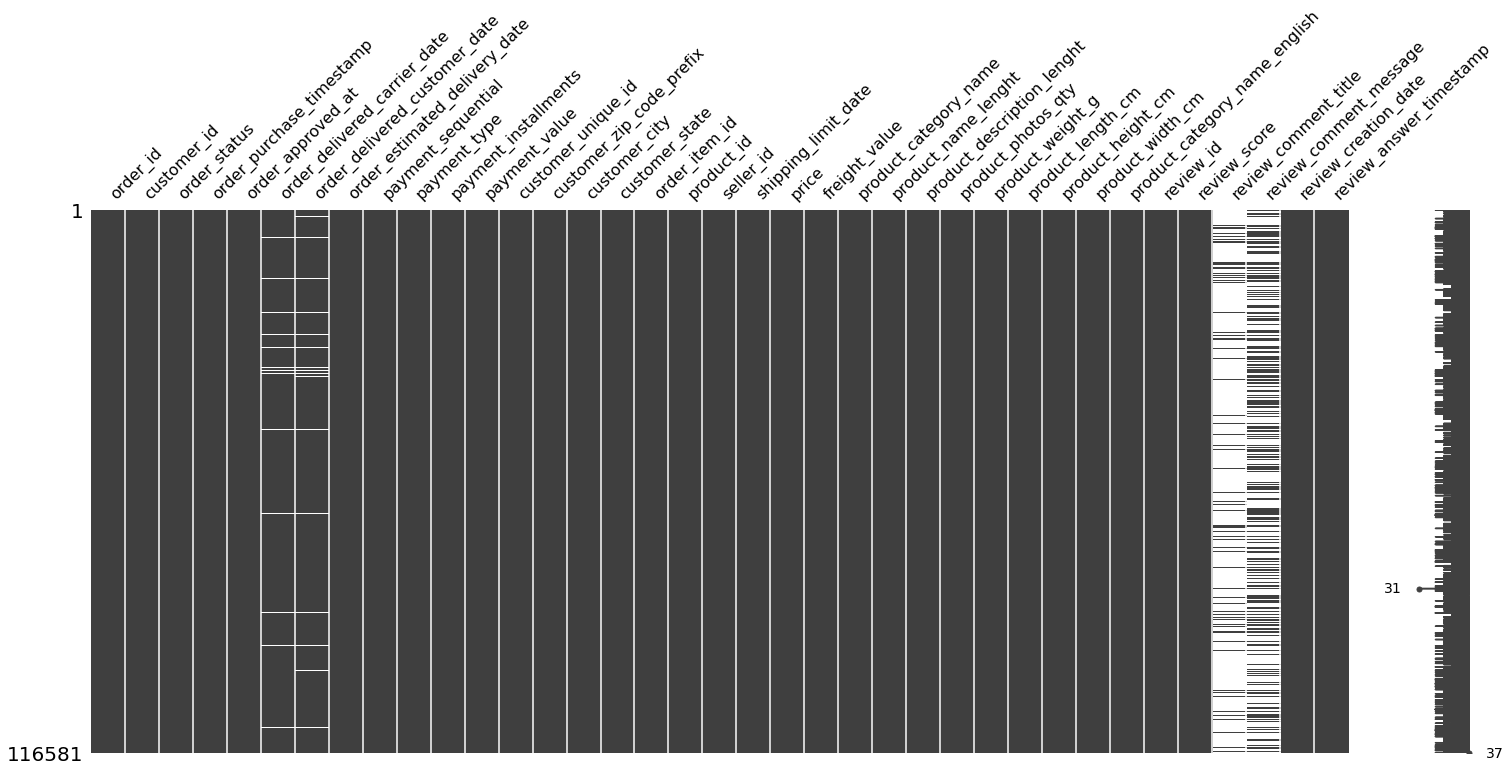

In [32]:
# Visualisation des données manquantes
msno.matrix(df)

Text(0.5, 0, 'Données manquantes en %')

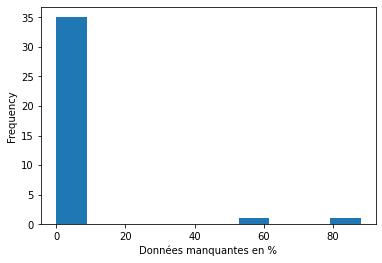

In [33]:
# Histogramme des données manquantes
ax = nbrNaN['Données manquantes en %'].plot.hist()
ax.set_xlabel('Données manquantes en %')

In [34]:
# Comptage du nombre de colonnes ayant plus que 50% de données manquantes
print('Nombre de colonnes avec plus de 50%  de données manquantes : '
      + str(sum(x > 50 for x in nbrNaN['Données manquantes en %'])))
display(nbrNaN[nbrNaN['Données manquantes en %'] > 50])

Nombre de colonnes avec plus de 50%  de données manquantes : 2


,Données manquantes en %
review_comment_title,87.99
review_comment_message,57.22


In [35]:
# Supprimer les colonnes ayant plus que 50% de données manquantes
indexDM = ['review_comment_title', 'review_comment_message']
df.drop(indexDM, axis=1, inplace=True)

In [36]:
# Compléter les données manquantes
df['order_approved_at'].fillna(df['order_purchase_timestamp'], inplace=True)
df['order_delivered_customer_date'].fillna(df['order_estimated_delivery_date'],
                                           inplace=True)
df.dropna(subset=['order_delivered_carrier_date'], axis=0, inplace=True)

<AxesSubplot:>

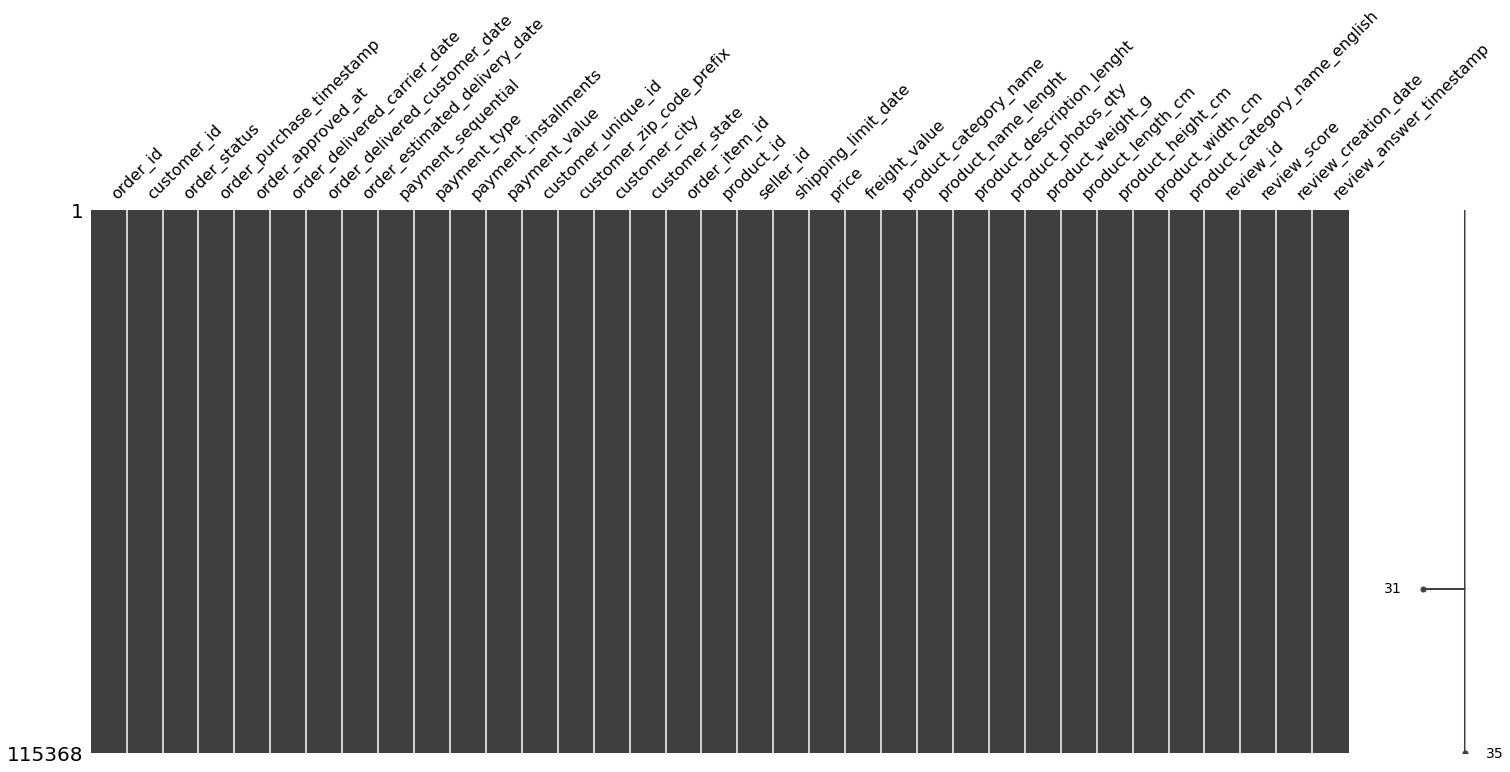

In [37]:
# Visualisation des données manquantes
msno.matrix(df)

### 2.2. Les données dupliquées <a class="anchor" id="section_2_2"></a>

Les deux premières lignes de codes ci-dessous permettent de trouver les données dupliquées. On va commencer à regarder dans un premier temps, avec deux noms de colonnes. Puis on va chercher avec la deuxième ligne de code l'index de colonne à partir duquel les lignes diffèrent. Ensuite, on revient sur la première ligne de code afin de rajouter les noms de colonnes dont les données sont identiques. Pour finir, on vérifie avec la deuxième ligne de code les données dupliquées.

Pour résumer, les lignes ayant le même :
- id de commande,
- le montant,
- id de produit,
- le même nombre de types de paiement utilisé,
- le nombre d'échéances.
peuvent présenter plusieurs avis différents. Ainsi, je décide de garder le dernier avis.

In [38]:
# Données dupliquées
dfDD = df[df.duplicated(subset=['order_id', 'payment_value', 'product_id',
                                'order_item_id', 'payment_sequential',
                                'payment_installments'], keep=False)]
print('Nombre de lignés dupliquées :')
sum(bool(x) for x in dfDD)

Nombre de lignés dupliquées :


35

In [39]:
# Recherche de l'index de colonne
subsetDD = dfDD.sort_values('order_id').iloc[0:2, 29:40]
display(subsetDD)

,product_width_cm,product_category_name_english,review_id,review_score,review_creation_date,review_answer_timestamp
55632,35.0,bed_bath_table,89a02c45c340aeeb1354a24e7d4b2c1e,5,2017-08-29 00:00:00,2017-08-30 01:59:12
55631,35.0,bed_bath_table,2a74b0559eb58fc1ff842ecc999594cb,5,2017-08-25 00:00:00,2017-08-29 21:45:57


In [40]:
# Suppression de données dupliquées même produit, même client,
# même montant, plusiers avis (garder le dernier)
df = df.sort_values(['order_id', 'review_answer_timestamp'])\
     .drop_duplicates(subset=['order_id', 'payment_value', 'product_id',
                              'order_item_id', 'payment_sequential',
                              'payment_installments'], keep='first')

### 2.3. Les données aberrantes/outliers <a class="anchor" id="section_2_3"></a>

In [41]:
# Supprimer les colonnes non-pertinentes
indexDNP = ['product_id', 'seller_id', 'customer_id', 'product_category_name',
            'product_weight_g', 'product_length_cm', 'product_height_cm',
            'product_width_cm', 'shipping_limit_date', 'order_approved_at',
            'order_estimated_delivery_date', 'product_name_lenght',
            'product_description_lenght', 'product_photos_qty',
            'review_creation_date', 'review_answer_timestamp',
            'customer_city', 'customer_state']
df.drop(indexDNP, axis=1, inplace=True)

In [42]:
# Garder que les lignes dont le statut est 'delivered'
df = df[df['order_status'] == 'delivered']
df.drop('order_status', axis=1, inplace=True)

In [43]:
# Regardons quelques statistiques
df.describe(include='all', datetime_is_numeric=True)

,order_id,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,order_item_id,price,freight_value,product_category_name_english,review_id,review_score
count,113382,113382,113382,113382,113382.000000,113382,113382.000000,113382.000000,113382,113382.000000,113382.000000,113382.000000,113382.000000,113382,113382,113382.000000
unique,95124,94620,78915,94335,NaN,4,NaN,NaN,92076,NaN,NaN,NaN,NaN,71,94631,NaN
top,895ab968e7bb0d5659d16cd74cd1650c,2017-08-08 20:26:31,2017-08-10 11:58:14,2017-08-14 12:46:18,NaN,credit_card,NaN,NaN,9a736b248f67d166d2fbb006bcb877c3,NaN,NaN,NaN,NaN,bed_bath_table,eef5dbca8d37dfce6db7d7b16dd0525e,NaN
freq,63,63,63,63,NaN,83695,NaN,NaN,75,NaN,NaN,NaN,NaN,11650,63,NaN
mean,NaN,NaN,NaN,NaN,1.089935,NaN,2.942363,172.236917,NaN,35081.798866,1.196830,120.180259,20.024298,NaN,NaN,4.068662
std,NaN,NaN,NaN,NaN,0.682076,NaN,2.777833,266.614006,NaN,29845.473879,0.701282,182.785920,15.752398,NaN,NaN,1.356731
min,NaN,NaN,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,1003.000000,1.000000,0.850000,0.000000,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,61.000000,NaN,11320.000000,1.000000,39.900000,13.080000,NaN,NaN,4.000000
50%,NaN,NaN,NaN,NaN,1.000000,NaN,2.000000,108.145000,NaN,24325.000000,1.000000,74.900000,16.320000,NaN,NaN,5.000000
75%,NaN,NaN,NaN,NaN,1.000000,NaN,4.000000,189.370000,NaN,58777.500000,1.000000,133.900000,21.200000,NaN,NaN,5.000000


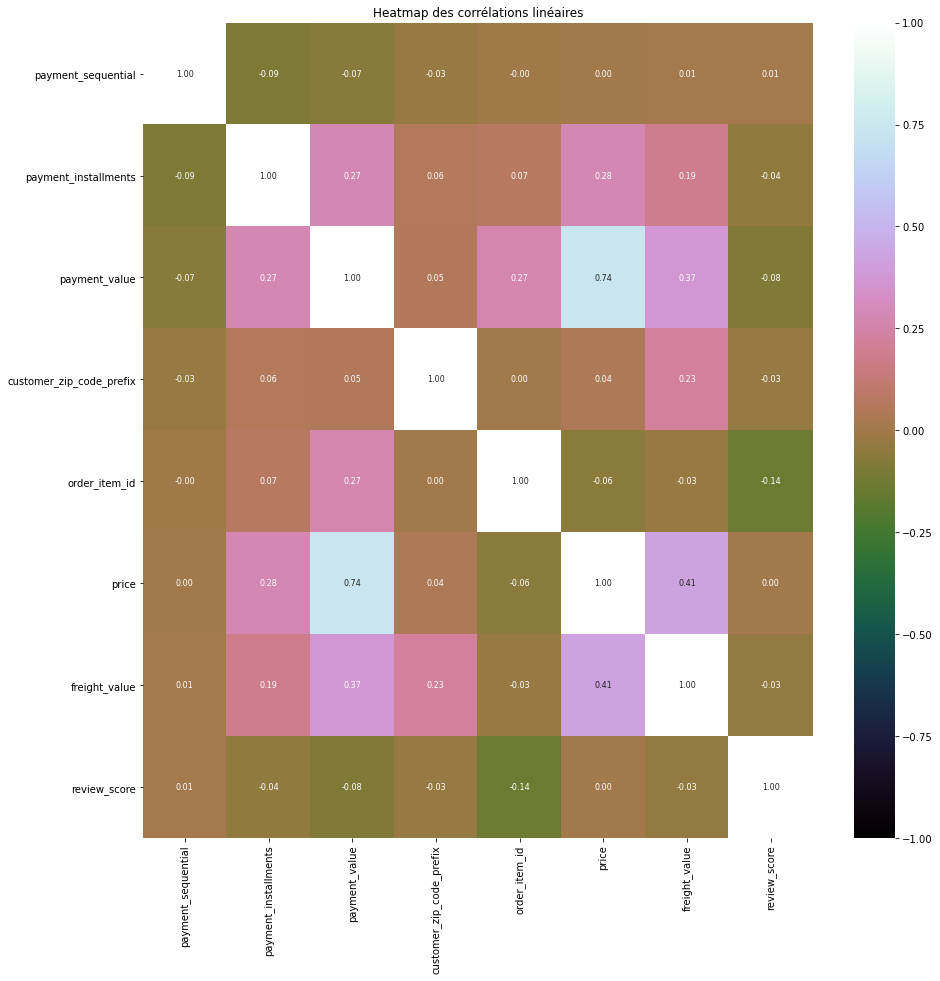

In [44]:
# Les variables corrélées
corr = df.corr()
fig, plt.subplots(figsize=(15, 15))
sns.heatmap(corr,
            annot=True,
            vmin=-1,
            vmax=1,
            fmt='.2f',
            annot_kws={'size':8},
            center=0,
            cmap='cubehelix')
plt.title('Heatmap des corrélations linéaires')
plt.show()

### 2.4. Transformation des dates <a class="anchor" id="section_2_4"></a>

In [45]:
# Transformation des dates
df.order_purchase_timestamp = pd.to_datetime(
    df.order_purchase_timestamp)
df.order_delivered_customer_date = pd.to_datetime(
    df.order_delivered_customer_date)
df.order_delivered_carrier_date = pd.to_datetime(
    df.order_delivered_carrier_date)

# Affichage
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113382 entries, 84412 to 54684
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113382 non-null  object        
 1   order_purchase_timestamp       113382 non-null  datetime64[ns]
 2   order_delivered_carrier_date   113382 non-null  datetime64[ns]
 3   order_delivered_customer_date  113382 non-null  datetime64[ns]
 4   payment_sequential             113382 non-null  int64         
 5   payment_type                   113382 non-null  object        
 6   payment_installments           113382 non-null  int64         
 7   payment_value                  113382 non-null  float64       
 8   customer_unique_id             113382 non-null  object        
 9   customer_zip_code_prefix       113382 non-null  int64         
 10  order_item_id                  113382 non-null  int64         
 1

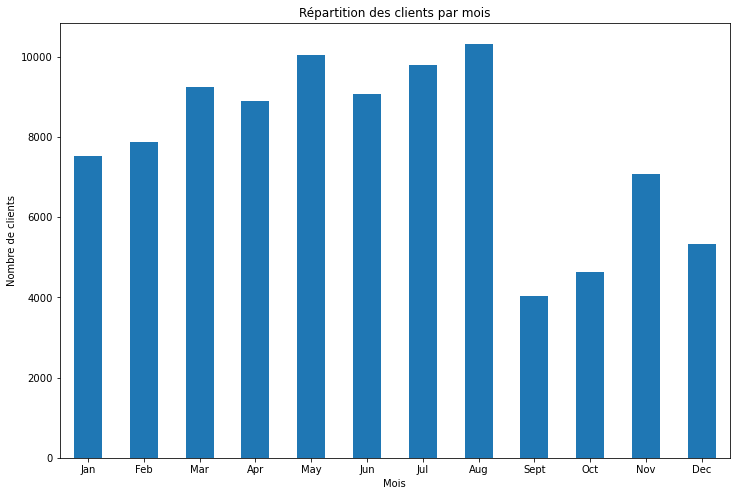

In [46]:
# Combien de client s'ajoute par mois
nbrClientMois = df.groupby(df['order_purchase_timestamp'].dt.month)\
    .agg({'customer_unique_id': 'nunique'})\
    .plot(figsize=(12, 8), kind='bar',
          title='Répartition des clients par mois',
          ylabel='Nombre de clients',
          xlabel='Mois',
          legend=False)
plt.xticks(np.arange(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                              'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'],
           rotation='horizontal')
plt.show()

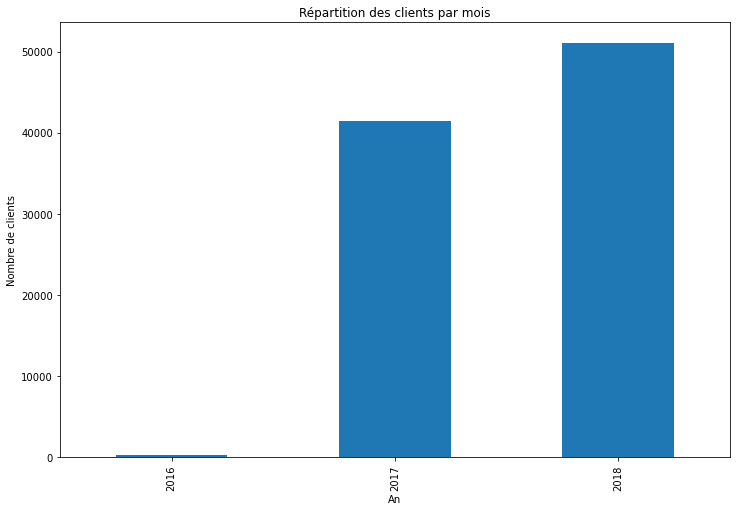

,customer_unique_id
order_purchase_timestamp,
2016,261
2017,41414
2018,51038


In [47]:
# Combien de client s'ajoute par an
nbrClientMois = df.groupby(df['order_purchase_timestamp'].dt.year)\
    .agg({'customer_unique_id': 'nunique'})\
    .plot(figsize=(12, 8), kind='bar',
          title='Répartition des clients par mois',
          ylabel='Nombre de clients',
          xlabel='An',
          legend=False)
plt.show()

display(df.groupby(df['order_purchase_timestamp'].dt.year)
        .agg({'customer_unique_id': 'nunique'}))

### 2.5. Transformation des variables catégorielles <a class="anchor" id="section_2_5"></a>

La colonne 'product_category_name_english' contient 71 valeurs uniques. C'est une colonne que je ne souhaite pas supprimer, car elle peut être utile dans le cadre de la segmentation des clients. Je cherche donc à réduire le nombre de données uniques au niveau de cette colonne afin de la conserver. Je décide de regrouper des catégories entre eux pour en former des nouvelles.
Après quelques recherches, une autre solution pour coder un grand nombre de catégories peut être de binairiser la variable en scindant en deux les données : le top 10 ou 5 (codage 1) et le reste (codage 0).

In [48]:
# Valeur unique pour les variables catégorielles pour
# supprimer les colonnes ayant un grand nombre de valeurs uniques
ValUniqCol = pd.DataFrame(df.select_dtypes('object')
                          .apply(pd.Series.nunique, axis=0),
                          columns=['Nombre de valeurs uniques'])
display(ValUniqCol)

,Nombre de valeurs uniques
order_id,95124
payment_type,4
customer_unique_id,92076
product_category_name_english,71
review_id,94631


In [49]:
# Transformation des catégories de produits
df['product_category'] = np.where((df['product_category_name_english']
                                   .str.contains('fashio|luggage') == True), 
                                  'fashion_clothing_accessories',
                         np.where((df['product_category_name_english']
                                   .str.contains('health|beauty|perfum')==True),
                                  'health_beauty',
                         np.where((df['product_category_name_english']
                                   .str.contains('toy|baby|diaper')==True),
                                  'toys_baby',
                         np.where((df['product_category_name_english'].
                                   str.contains('book|cd|dvd|media')==True),
                                  'books_cds_media',
                         np.where((df['product_category_name_english']
                                   .str.contains('grocer|food|drink')==True), 
                                  'groceries_food_drink',
                         np.where((df['product_category_name_english']
                                   .str.contains('phon|compu|tablet|electro|consol')==True), 
                                  'technology',
                         np.where((df['product_category_name_english']
                                   .str.contains('home|furnitur|garden|bath|house|applianc')==True), 
                                  'home_furniture',
                         np.where((df['product_category_name_english']
                                   .str.contains('flow|gift|stuff')==True),
                                 'flowers_gifts',
                         np.where((df['product_category_name_english']
                                   .str.contains('sport')==True),
                                 'sport',
                                 'other')))))))))

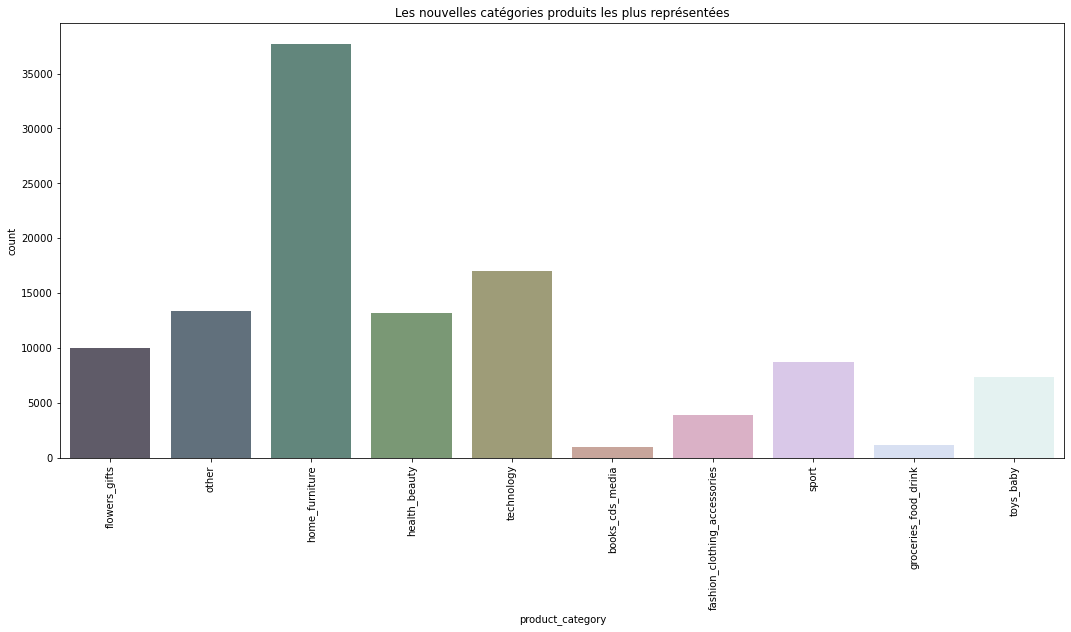

In [50]:
# Affichage
fig = plt.figure(figsize=(18, 8))
ax = sns.countplot(data=df, x='product_category',
                   palette='cubehelix', alpha=0.7)
ax.set_facecolor('w')
plt.xticks(range(0, df['product_category'].nunique()),
           df['product_category'].unique(),
           rotation=90)
plt.title('Les nouvelles catégories produits les plus représentées')
plt.show()

In [51]:
# Supprimer la première colonne avec 71 variables catégorielles
df.drop('product_category_name_english', axis=1, inplace=True)

In [52]:
# Valeur unique
ValUniqCol = pd.DataFrame(df.select_dtypes('object')
                          .apply(pd.Series.nunique, axis=0),
                          columns=['Nombre de valeurs uniques'])
display(ValUniqCol)

,Nombre de valeurs uniques
order_id,95124
payment_type,4
customer_unique_id,92076
review_id,94631
product_category,10


### 2.6. Création des nouvelles variables <a class="anchor" id="section_2_6"></a>

In [53]:
# Délai de livraison
df['delivery_delta_days'] = (df.order_delivered_customer_date
                             - df.order_purchase_timestamp)\
                             .dt.round('1d').dt.days
df.drop('order_delivered_customer_date', axis=1, inplace=True)
#df.drop('order_purchase_timestamp', axis=1, inplace=True)
# On a besoin de order_purchase_timestamp pour la partie
# maintenance.

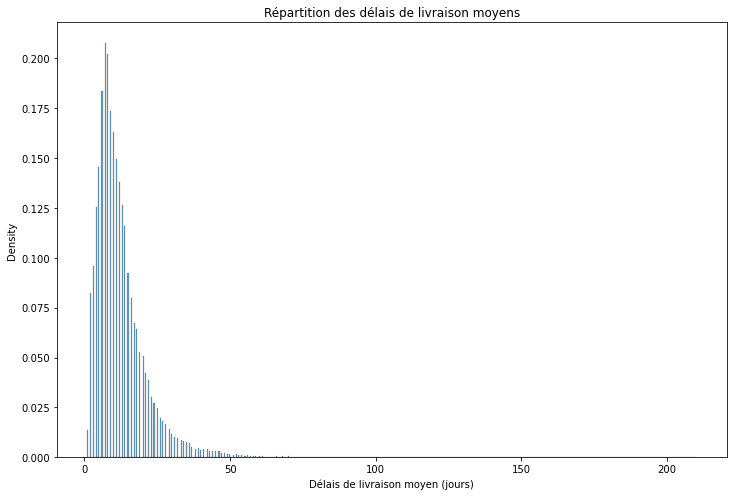

In [54]:
fig = plt.figure(figsize=(12, 8))
ax = sns.histplot(data=df, x='delivery_delta_days',
                  stat='density',
                  edgecolor='black',
                  palette='cubehelix', alpha=0.7)
ax.set_facecolor('w')
plt.xlabel('Délais de livraison moyen (jours)')
plt.title('Répartition des délais de livraison moyens')
plt.show()

In [55]:
# Nombre de paiements différents & nombre d'échéances totales de la commande
payments = df.groupby(by='order_id').agg(
    {'payment_sequential': 'count',
     'payment_installments': 'sum'})

df.drop('payment_sequential', axis=1, inplace=True)
df.drop('payment_installments', axis=1, inplace=True)

df = pd.merge(df, payments, on='order_id')

df = df.rename(columns={'payment_sequential': 'nb_payment_sequential',
                        'payment_installments': 'sum_payment_installments'})

In [56]:
# Affichage
display(df.sort_values('customer_unique_id', ascending=False).head())

,order_id,order_purchase_timestamp,order_delivered_carrier_date,payment_type,payment_value,customer_unique_id,customer_zip_code_prefix,order_item_id,price,freight_value,review_id,review_score,product_category,delivery_delta_days,nb_payment_sequential,sum_payment_installments
109625,f79a35da168301ae56922475da21117b,2017-05-02 20:18:45,2017-05-04 12:05:22,credit_card,71.56,ffffd2657e2aad2907e67c3e9daecbeb,83608,1,56.99,14.57,c226e4b3cc6f681717f77f5c15a0bafd,5,health_beauty,8,1,4
65700,94d3ee0bc2a0af9d4fa47a4d63616e8d,2018-05-02 15:17:41,2018-05-03 16:45:00,credit_card,133.69,ffff5962728ec6157033ef9805bacc48,29460,1,115.00,18.69,9afc85900a86fb8df3c31721f1869756,5,flowers_gifts,12,1,5
112396,fdc45e6c7555e6cb3cc0daca2557dbe1,2017-02-07 15:49:16,2017-02-08 10:04:37,credit_card,112.46,ffff371b4d645b6ecea244b27531430a,78552,1,89.90,22.56,11c3e9036551ef3649c3c781f9d24e1d,5,other,15,1,1
88343,c71b9252fd7b3b263aaa4cb09319a323,2017-12-10 20:07:56,2017-12-21 16:27:01,credit_card,84.58,fffea47cd6d3cc0a88bd621562a9d061,44054,1,64.89,19.69,b194b439cde1d72277a2d0545a5de82e,4,toys_baby,30,1,1
50793,725cf8e9c24e679a8a5a32cb92c9ce1e,2017-06-08 21:00:36,2017-06-23 13:03:27,credit_card,2067.42,fffcf5a5ff07b0908bd4e2dbc735a684,55250,2,680.00,239.14,bf0bcc92778d81c81f4e270732edcee6,5,health_beauty,28,2,20


In [57]:
# Avis présent ? & la note
reviews = df.groupby('order_id').agg(
    {'review_id': 'count',
     'review_score': 'mean'})

df.drop('review_id', axis=1, inplace=True)
df.drop('review_score', axis=1, inplace=True)

df = pd.merge(df, reviews, on='order_id')

df = df.rename(columns={'review_id': 'is_reviewed'})

In [58]:
# Affichage
display(df.sort_values('customer_unique_id', ascending=False).head())

,order_id,order_purchase_timestamp,order_delivered_carrier_date,payment_type,payment_value,customer_unique_id,customer_zip_code_prefix,order_item_id,price,freight_value,product_category,delivery_delta_days,nb_payment_sequential,sum_payment_installments,is_reviewed,review_score
109625,f79a35da168301ae56922475da21117b,2017-05-02 20:18:45,2017-05-04 12:05:22,credit_card,71.56,ffffd2657e2aad2907e67c3e9daecbeb,83608,1,56.99,14.57,health_beauty,8,1,4,1,5
65700,94d3ee0bc2a0af9d4fa47a4d63616e8d,2018-05-02 15:17:41,2018-05-03 16:45:00,credit_card,133.69,ffff5962728ec6157033ef9805bacc48,29460,1,115.00,18.69,flowers_gifts,12,1,5,1,5
112396,fdc45e6c7555e6cb3cc0daca2557dbe1,2017-02-07 15:49:16,2017-02-08 10:04:37,credit_card,112.46,ffff371b4d645b6ecea244b27531430a,78552,1,89.90,22.56,other,15,1,1,1,5
88343,c71b9252fd7b3b263aaa4cb09319a323,2017-12-10 20:07:56,2017-12-21 16:27:01,credit_card,84.58,fffea47cd6d3cc0a88bd621562a9d061,44054,1,64.89,19.69,toys_baby,30,1,1,1,4
50793,725cf8e9c24e679a8a5a32cb92c9ce1e,2017-06-08 21:00:36,2017-06-23 13:03:27,credit_card,2067.42,fffcf5a5ff07b0908bd4e2dbc735a684,55250,2,680.00,239.14,health_beauty,28,2,20,2,5


In [59]:
# Nombre moyenne d'articles par commande
products_per_order = df.groupby(['customer_unique_id', 'order_id'])\
                        .agg({'order_item_id': 'count'})
products_per_order = products_per_order.groupby('customer_unique_id')\
                        .agg({'order_item_id': 'mean'})

df.drop('order_item_id', axis=1, inplace=True)

df = pd.merge(df, products_per_order, on='customer_unique_id')\
        .rename(columns={'order_item_id': 'mean_nb_items'})

In [60]:
# Affichage
display(df.sort_values('customer_unique_id', ascending=False).head())

,order_id,order_purchase_timestamp,order_delivered_carrier_date,payment_type,payment_value,customer_unique_id,customer_zip_code_prefix,price,freight_value,product_category,delivery_delta_days,nb_payment_sequential,sum_payment_installments,is_reviewed,review_score,mean_nb_items
109847,f79a35da168301ae56922475da21117b,2017-05-02 20:18:45,2017-05-04 12:05:22,credit_card,71.56,ffffd2657e2aad2907e67c3e9daecbeb,83608,56.99,14.57,health_beauty,8,1,4,1,5,1.0
67631,94d3ee0bc2a0af9d4fa47a4d63616e8d,2018-05-02 15:17:41,2018-05-03 16:45:00,credit_card,133.69,ffff5962728ec6157033ef9805bacc48,29460,115.00,18.69,flowers_gifts,12,1,5,1,5,1.0
112452,fdc45e6c7555e6cb3cc0daca2557dbe1,2017-02-07 15:49:16,2017-02-08 10:04:37,credit_card,112.46,ffff371b4d645b6ecea244b27531430a,78552,89.90,22.56,other,15,1,1,1,5,1.0
89636,c71b9252fd7b3b263aaa4cb09319a323,2017-12-10 20:07:56,2017-12-21 16:27:01,credit_card,84.58,fffea47cd6d3cc0a88bd621562a9d061,44054,64.89,19.69,toys_baby,30,1,1,1,4,1.0
52803,725cf8e9c24e679a8a5a32cb92c9ce1e,2017-06-08 21:00:36,2017-06-23 13:03:27,credit_card,2067.42,fffcf5a5ff07b0908bd4e2dbc735a684,55250,680.00,239.14,health_beauty,28,2,20,2,5,2.0


In [61]:
# Nombre commande, somme prix et frais de port
others = df.groupby('customer_unique_id')\
            .agg({'order_id': 'nunique',
                  'price': 'sum',
                  'freight_value': 'sum',
                  'payment_value': 'sum'})
# ajouter la moyenne de payment_value
df.drop('order_id', axis=1, inplace=True)
df.drop('price', axis=1, inplace=True)
df.drop('freight_value', axis=1, inplace=True)
df.drop('payment_value', axis=1, inplace=True)

df = pd.merge(df, others, on='customer_unique_id')\
        .rename(columns={'order_id': 'nb_orders',
                         'price': 'sum_price',
                         'freight_value': 'sum_freight',
                         'payment_value': 'sum_payment'})

In [62]:
# Affichage
display(df.sort_values('customer_unique_id', ascending=False).head())

,order_purchase_timestamp,order_delivered_carrier_date,payment_type,customer_unique_id,customer_zip_code_prefix,product_category,delivery_delta_days,nb_payment_sequential,sum_payment_installments,is_reviewed,review_score,mean_nb_items,nb_orders,sum_price,sum_freight,sum_payment
109847,2017-05-02 20:18:45,2017-05-04 12:05:22,credit_card,ffffd2657e2aad2907e67c3e9daecbeb,83608,health_beauty,8,1,4,1,5,1.0,1,56.99,14.57,71.56
67631,2018-05-02 15:17:41,2018-05-03 16:45:00,credit_card,ffff5962728ec6157033ef9805bacc48,29460,flowers_gifts,12,1,5,1,5,1.0,1,115.00,18.69,133.69
112452,2017-02-07 15:49:16,2017-02-08 10:04:37,credit_card,ffff371b4d645b6ecea244b27531430a,78552,other,15,1,1,1,5,1.0,1,89.90,22.56,112.46
89636,2017-12-10 20:07:56,2017-12-21 16:27:01,credit_card,fffea47cd6d3cc0a88bd621562a9d061,44054,toys_baby,30,1,1,1,4,1.0,1,64.89,19.69,84.58
52803,2017-06-08 21:00:36,2017-06-23 13:03:27,credit_card,fffcf5a5ff07b0908bd4e2dbc735a684,55250,health_beauty,28,2,20,2,5,2.0,1,1570.00,497.42,4134.84


In [63]:
# Recency
last_date = df['order_delivered_carrier_date'].max() + pd.to_timedelta(1, 'D')

recency = df.groupby('customer_unique_id')\
            .agg(recency=('order_delivered_carrier_date',
                          lambda x: (last_date - x.max()).days))

df.drop('order_delivered_carrier_date', axis=1, inplace=True)

df = pd.merge(df, recency, on='customer_unique_id')\
        .rename(columns={'order_delivered_carrier_date': 'recency'})

In [64]:
# Affichage
display(df.sort_values('customer_unique_id', ascending=False).head())

,order_purchase_timestamp,payment_type,customer_unique_id,customer_zip_code_prefix,product_category,delivery_delta_days,nb_payment_sequential,sum_payment_installments,is_reviewed,review_score,mean_nb_items,nb_orders,sum_price,sum_freight,sum_payment,recency
109847,2017-05-02 20:18:45,credit_card,ffffd2657e2aad2907e67c3e9daecbeb,83608,health_beauty,8,1,4,1,5,1.0,1,56.99,14.57,71.56,496
67631,2018-05-02 15:17:41,credit_card,ffff5962728ec6157033ef9805bacc48,29460,flowers_gifts,12,1,5,1,5,1.0,1,115.00,18.69,133.69,132
112452,2017-02-07 15:49:16,credit_card,ffff371b4d645b6ecea244b27531430a,78552,other,15,1,1,1,5,1.0,1,89.90,22.56,112.46,581
89636,2017-12-10 20:07:56,credit_card,fffea47cd6d3cc0a88bd621562a9d061,44054,toys_baby,30,1,1,1,4,1.0,1,64.89,19.69,84.58,265
52803,2017-06-08 21:00:36,credit_card,fffcf5a5ff07b0908bd4e2dbc735a684,55250,health_beauty,28,2,20,2,5,2.0,1,1570.00,497.42,4134.84,446


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113382 entries, 0 to 113381
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_purchase_timestamp  113382 non-null  datetime64[ns]
 1   payment_type              113382 non-null  object        
 2   customer_unique_id        113382 non-null  object        
 3   customer_zip_code_prefix  113382 non-null  int64         
 4   product_category          113382 non-null  object        
 5   delivery_delta_days       113382 non-null  int64         
 6   nb_payment_sequential     113382 non-null  int64         
 7   sum_payment_installments  113382 non-null  int64         
 8   is_reviewed               113382 non-null  int64         
 9   review_score              113382 non-null  int64         
 10  mean_nb_items             113382 non-null  float64       
 11  nb_orders                 113382 non-null  int64         
 12  su

In [66]:
# Encodage des variables catégorielles
df = pd.get_dummies(df, columns=['payment_type', 'product_category'])

In [67]:
# Valeur unique
ValUniqCol = pd.DataFrame(df.select_dtypes('object')
                          .apply(pd.Series.nunique, axis=0),
                          columns=['Nombre de valeurs uniques'])
display(ValUniqCol)
df.shape

,Nombre de valeurs uniques
customer_unique_id,92076


(113382, 28)

In [68]:
# Affichage
display(df.sort_values('customer_unique_id', ascending=False).head())

,order_purchase_timestamp,customer_unique_id,customer_zip_code_prefix,delivery_delta_days,nb_payment_sequential,sum_payment_installments,is_reviewed,review_score,mean_nb_items,nb_orders,...,product_category_books_cds_media,product_category_fashion_clothing_accessories,product_category_flowers_gifts,product_category_groceries_food_drink,product_category_health_beauty,product_category_home_furniture,product_category_other,product_category_sport,product_category_technology,product_category_toys_baby
109847,2017-05-02 20:18:45,ffffd2657e2aad2907e67c3e9daecbeb,83608,8,1,4,1,5,1.0,1,...,0,0,0,0,1,0,0,0,0,0
67631,2018-05-02 15:17:41,ffff5962728ec6157033ef9805bacc48,29460,12,1,5,1,5,1.0,1,...,0,0,1,0,0,0,0,0,0,0
112452,2017-02-07 15:49:16,ffff371b4d645b6ecea244b27531430a,78552,15,1,1,1,5,1.0,1,...,0,0,0,0,0,0,1,0,0,0
89636,2017-12-10 20:07:56,fffea47cd6d3cc0a88bd621562a9d061,44054,30,1,1,1,4,1.0,1,...,0,0,0,0,0,0,0,0,0,1
52803,2017-06-08 21:00:36,fffcf5a5ff07b0908bd4e2dbc735a684,55250,28,2,20,2,5,2.0,1,...,0,0,0,0,1,0,0,0,0,0


In [69]:
df.set_index("customer_unique_id", inplace=True)
df.head()

,order_purchase_timestamp,customer_zip_code_prefix,delivery_delta_days,nb_payment_sequential,sum_payment_installments,is_reviewed,review_score,mean_nb_items,nb_orders,sum_price,...,product_category_books_cds_media,product_category_fashion_clothing_accessories,product_category_flowers_gifts,product_category_groceries_food_drink,product_category_health_beauty,product_category_home_furniture,product_category_other,product_category_sport,product_category_technology,product_category_toys_baby
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
871766c5855e863f6eccc05f988b23cb,2017-09-13 08:59:02,28013,8,1,2,1,5,1.0,1,58.90,...,0,0,1,0,0,0,0,0,0,0
eb28e67c4c0b83846050ddfb8a35d051,2017-04-26 10:53:06,15775,16,1,3,1,4,1.0,2,252.78,...,0,0,0,0,0,0,1,0,0,0
eb28e67c4c0b83846050ddfb8a35d051,2017-09-18 16:12:04,15775,7,1,1,1,5,1.0,2,252.78,...,0,0,0,0,0,0,0,0,1,0
3818d81c6709e39d06b2738a8d3a2474,2018-01-14 14:33:31,35661,8,1,5,1,5,1.0,1,199.00,...,0,0,0,0,0,1,0,0,0,0
af861d436cfc08b2c2ddefd0ba074622,2018-08-08 10:00:35,12952,6,1,2,1,4,1.0,1,12.99,...,0,0,0,0,1,0,0,0,0,0


In [70]:
# Sauvegarder dans un fichier
df.to_csv("olist_customers_clustering.csv")

In [71]:
#df.to_csv("/content/drive/My Drive/0_OC_ParcoursIA/Projet5/olist_customers_clustering.csv")

In [72]:
# Enregistrer la session notebook
#dill.dump_session('notebook_env_1708.db')

In [73]:
# Pour la vérification de la convention PEP8
#%pycodestyle_off